### WINE QUALITY PREDICTION BY PREVIOUS DATA

## IMPORT LIBRARIES AND INSERT DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

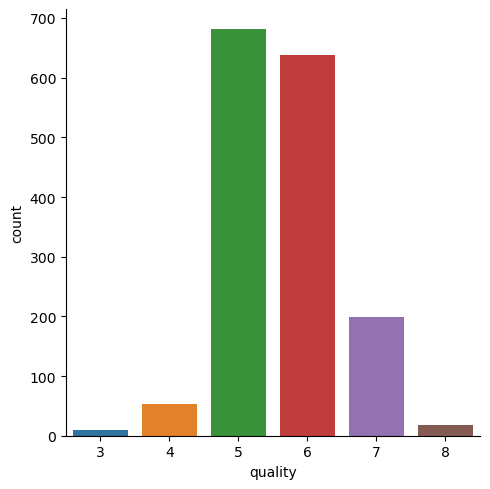

In [8]:
## visually understanding of relationship between data
sns.catplot(x = 'quality', data =data, kind ='count')

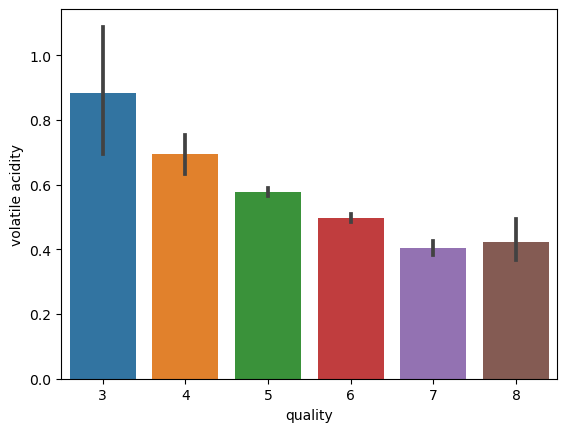

In [9]:
## plot relation between all labels and quality

sns.barplot(x ='quality', y= 'volatile acidity', data =data)

plt.show()

In [10]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

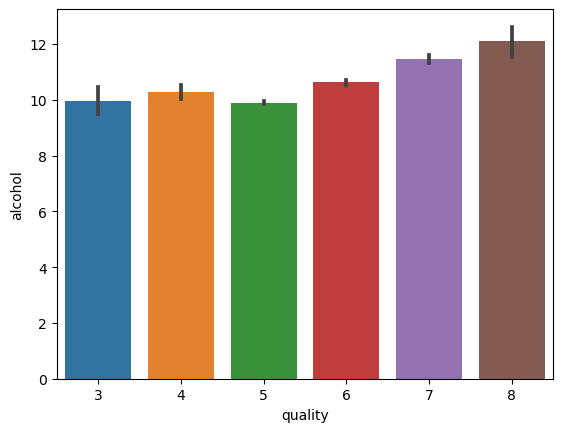

In [11]:

sns.barplot(x ='quality', y= 'alcohol', data =data)

plt.show()

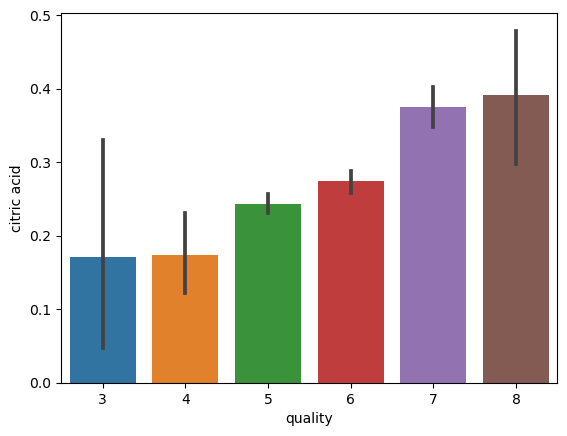

In [12]:
sns.barplot(x ='quality', y= 'citric acid', data =data)
plt.show()

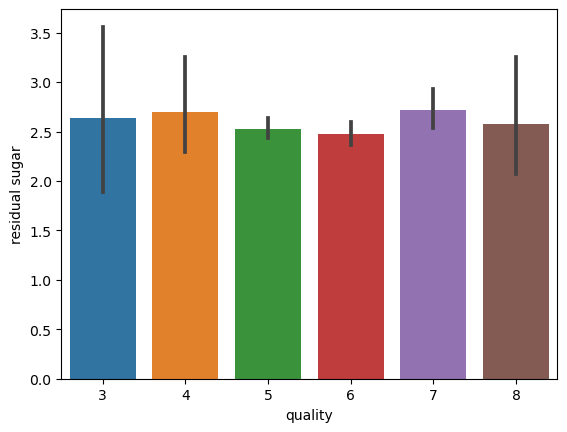

In [13]:
sns.barplot(x ='quality', y= 'residual sugar', data =data)
plt.show()

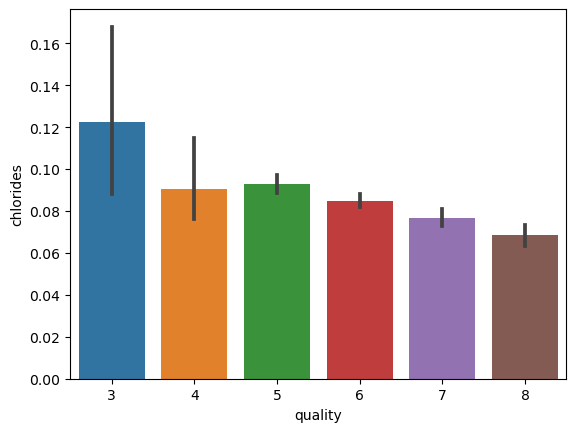

In [14]:

sns.barplot(x ='quality', y= 'chlorides', data =data)
plt.show()

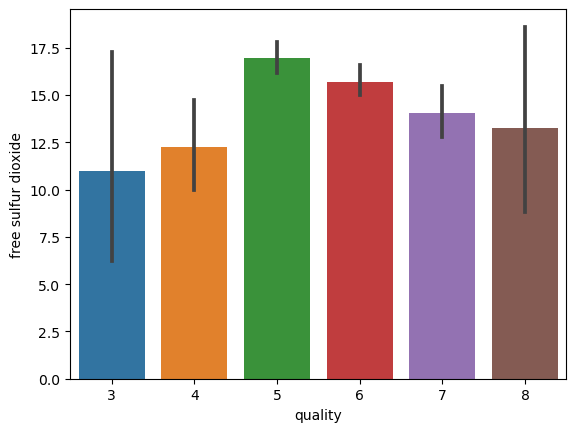

In [15]:
sns.barplot(x ='quality', y= 'free sulfur dioxide', data =data)
plt.show()

In [16]:

corelation = data.corr()

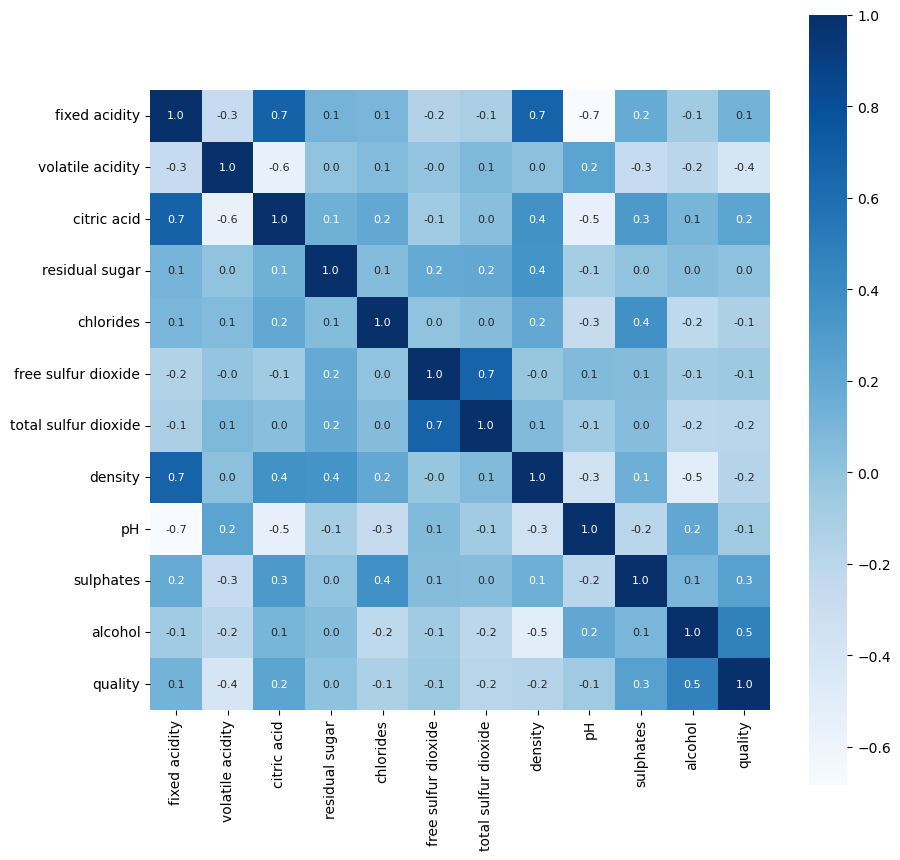

In [17]:
## corealtionship between all labels in dataset
plt.figure(figsize=(10,10))
sns.heatmap(corelation,cbar =True,fmt ='.1f',square =True,annot =True,annot_kws ={'size':8},cmap ='Blues')
plt.show()

In [18]:
## data processing for model preparation

x = data.drop(['quality'], axis =1)

In [19]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [20]:
y = data['quality'].apply(lambda x: 1 if x >=7 else 0)

In [21]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [24]:
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state =11,test_size =0.2)

In [26]:
print(x_train.shape,
          x_test.shape
      ,y_train.shape,
      y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [32]:
model = RandomForestClassifier()

In [34]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
pred = model.predict(x_test)

In [41]:
acc =accuracy_score(pred,y_test)

In [43]:
acc

0.915625

In [51]:
###prediction

input = (12.0,0.45,0.55,2.0,0.073,25.0,49.0,0.9997,3.1,0.76,10.3)

array = np.asarray(input)

In [52]:
sha =array.reshape(1,-1)

predd =model.predict(sha)

if (predd[0] == 1):
    print('good quality')
    
else:
    print('bad qulaity')

bad qulaity


C:\Users\91772\anconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
